# Hotel Booking Prediction Using Machine Learning

## Implementing the algorithm in this paper: https://www.ijraset.com/best-journal/hotel-booking-prediction-using-machine-learning

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


#### Step 1: Load and Read the Data (hotel_bookings.csv)

In [80]:
source_file = 'hotel_bookings.csv'
data = pd.read_csv(source_file)

data

data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Step 2: Separate Labels from Features

In [81]:
# we will use is_cancelled as the main label

data.drop_duplicates()
label = data['is_canceled']
data.drop(['is_canceled'], axis = 1, inplace = True)

### Step 3: Preprocess and Split the Data

In [104]:
# apply Label Encoder to the data

le = LabelEncoder()
data[data.select_dtypes(include = ['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(le.fit_transform)

# replace all NaN with 0 or N/A, running the RandomForest with NaN values will cause it to go funky

data.company.fillna(value = 0, inplace = True)
data.agent.fillna(value = 0, inplace = True)
data.children.fillna(value = 0, inplace = True)
data.country.fillna(value = 0, inplace = True)

# separating the numerical and categorical data (only use numerical)

data_num = data.select_dtypes(["int64","float"])
data_cat = data.select_dtypes("object") # we will not use this

x = data_num
y = label

# train test split
# the paper does not specify the test_size and random_state, so arbitrarily choose a good enough number

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 544)
print("Train Shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)


Train Shape:  (11939, 19)
Test Shape:  (107451, 19)


### Step 4: Implement the Random Forest Classifier

In [105]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Making predictions
y_test_pred = rf.predict(X_test)


In [106]:
# Get metrics for the model

acc_score = accuracy_score(y_test, y_test_pred)
rec_score = recall_score(y_test, y_test_pred)
prec_score = precision_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('Accuracy: ', acc_score)
print('Recall: ', rec_score)
print('Precision: ', prec_score)
print('F1 Score: ', f1score)

Accuracy:  0.8232962001284306
Recall:  0.6615504225917287
Precision:  0.8276749294006903
F1 Score:  0.7353470024950168


### Step 5: Use GridSearchCV to Find the Best Params for RandomForest

In [112]:
# parameters we will test; arbitrarily chosen

param_grid = { 
    'n_estimators': [300, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [ 4, 5, 6],
    'criterion' :['gini', 'entropy']
}

# run GridSearch and find the best parameters

CV_rfc = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 400]})

In [113]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 300}

In [115]:
# implement random forest using these parameters and get results


rf_CV = RandomForestClassifier(criterion = 'entropy', max_depth = 6, max_features = 'log2', n_estimators = 300)
rf_CV.fit(X_train, y_train)

# Making predictions
y_test_pred = rf_CV.predict(X_test)

acc_score2 = accuracy_score(y_test, y_test_pred)
rec_score2 = recall_score(y_test, y_test_pred)
prec_score2 = precision_score(y_test, y_test_pred)
f1score2 = f1_score(y_test, y_test_pred)

print('Accuracy: ', acc_score2)
print('Recall: ', rec_score2)
print('Precision: ', prec_score2)
print('F1 Score: ', f1score2)

Accuracy:  0.767196210365655
Recall:  0.5803927469716349
Precision:  0.7363966142684402
F1 Score:  0.6491535645661228


### Step 6: Compare Results 

Note the difference in numbers because many assumptions were made as they were not specified in the paper:
- data split
- columns used
- param_grid used

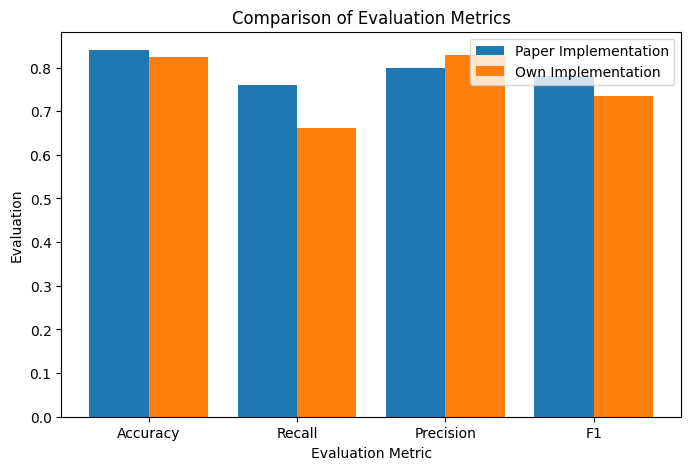

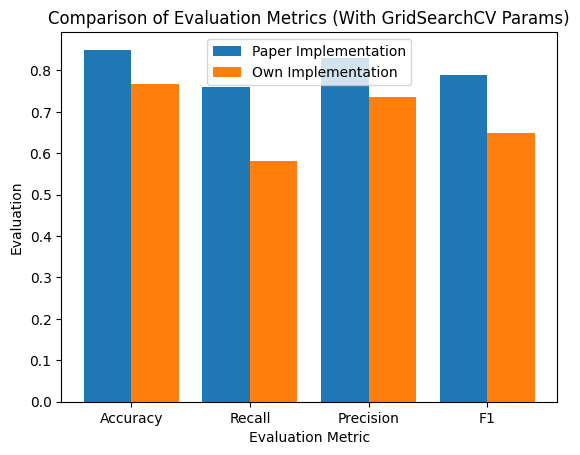

In [118]:
x = ['Accuracy','Recall','Precision', 'F1']

y_paper = [0.84, 0.76, 0.80, 0.78]
y_paper2 = [0.85, 0.76, 0.83, 0.79]

y_own = [acc_score, rec_score, prec_score, f1score]
y_own2 = [acc_score2, rec_score2, prec_score2, f1score2]
  
x_axis = np.arange(len(x))

plt.figure(figsize = (8, 5))

plt.bar(x_axis - 0.2, y_paper, 0.4, label = 'Paper Implementation')
plt.bar(x_axis + 0.2, y_own, 0.4, label = 'Own Implementation')

plt.xticks(x_axis, x)
plt.xlabel("Evaluation Metric")
plt.ylabel("Evaluation")
plt.title("Comparison of Evaluation Metrics")
plt.legend()
plt.show()

plt.bar(x_axis - 0.2, y_paper2, 0.4, label = 'Paper Implementation')
plt.bar(x_axis + 0.2, y_own2, 0.4, label = 'Own Implementation')
plt.xticks(x_axis, x)
plt.xlabel("Evaluation Metric")
plt.ylabel("Evaluation")
plt.title("Comparison of Evaluation Metrics (With GridSearchCV Params)")
plt.legend()
plt.show()